In [2]:
import pandas as pd
df = pd.read_csv("BS10DataFrame.csv")
df.set_index("Unnamed: 0", inplace=True)
print(df.loc[df["Compounds"].str.contains("1_1-M-Adam")]) #get the compound and its values (test)
print(df)

            RetentionTime Sample 1   Compounds       A        B  \
Unnamed: 0                                                        
0                            12.22  1_1-M-Adam  3004.0  14631.0   

            NormalisedToBS10  % 2/3 After Normalisation  
Unnamed: 0                                               
0                 8095.67396                  55.332335  
            RetentionTime Sample 1          Compounds        A        B  \
Unnamed: 0                                                                
0                            12.22         1_1-M-Adam   3004.0  14631.0   
1                            15.18      2_1,2-DM-Adam   2723.0   9497.0   
2                            15.55            3_i-C13   2108.0  10892.0   
3                            15.46     4_2-M-Tetralin   8771.0  33691.0   
4                            15.37  5_c-1,3,4-TM-Adam   1912.0   6980.0   
...                            ...                ...      ...      ...   
140                     

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


def makeGraph_line(show_output=False,input_path=r"C:\Users\zanyi\OneDrive\Git hub\Python\Outside Work\LineValues.csv",
    output_path=r"C:\Users\zanyi\OneDrive\Git hub\Python\Outside Work\Output",name="test",defaultx = 0, defaulty=0, show_dataframe=True,
    figsize=(16,10),title="A - B: normalised to BS10",fileType=".jpg"):
    df = pd.read_csv(input_path)
    
    try:
        retentionTime = df["Retention time"]
    except KeyError:
        retentionTime = df.iloc[:, [defaulty+1]]
    try:
        BS10 = df["BS10%2/3"]
    except KeyError:
        BS10 = df.iloc[:, [defaulty+2]]
    fig, ax = plt.subplots(figsize=figsize)
    multiplier = [4,7,6,2,4,11,9,2,4,14,8,6,11,4,6,26,6,6,9]
    if show_dataframe:
        print(df)
    #setting up
    x = np.array((df["ret time"].tolist()))
    x = x[~np.isnan(x)]
    y = np.array(df["y-value1"].tolist())
    y = y[~np.isnan(y)]
    y2 = np.array(df["y-value2"].tolist())
    y2 = y2[~np.isnan(y2)]


    #n-Cx
    nCx = defaultx+0
    datax = retentionTime.iloc[nCx:nCx+multiplier[0]].values.flatten().tolist() #multiplier index = count-1
    datay = BS10.iloc[nCx:nCx+multiplier[0]].values.flatten().tolist()
    ax.plot(datax,datay , marker='s',markerfacecolor='none', ls='none',color = "green",label = "n-Cx")
    #BS
    BS = defaultx+34
    datax = retentionTime.iloc[BS:BS+multiplier[6]].values.flatten().tolist()
    datay = BS10.iloc[BS:BS+multiplier[6]].values.flatten().tolist()
    ax.plot(datax,datay , marker='D',markerfacecolor='none', ls='none',color = "black",label = "BS")
    #Cx-tol
    tol = defaultx+77
    datax = retentionTime.iloc[tol:tol+multiplier[12]].values.flatten().tolist()
    datay = BS10.iloc[tol:tol+multiplier[12]].values.flatten().tolist()
    ax.plot(datax,datay , marker='x', ls='none',color = "red",label = "Cx-tol")
    ax.plot(datax,datay , marker='|', ls='none',color = "red")
    #FAME
    fame = defaultx+136
    datax = retentionTime.iloc[fame:fame+multiplier[18]].values.flatten().tolist()
    datay = BS10.iloc[fame:fame+multiplier[18]].values.flatten().tolist()
    ax.plot(datax,datay , marker='s', ls='none',color = "green",label = "FAME",ms=6)

    #iso-Cx
    isoCx = defaultx+4
    datax = retentionTime.iloc[isoCx:isoCx+multiplier[1]].values.flatten().tolist()
    datay = BS10.iloc[isoCx:isoCx+multiplier[1]].values.flatten().tolist()
    ax.plot(datax,datay , marker='s', ls='none',color = "Grey",label = "ico-Cx",markeredgewidth=1, markeredgecolor="black")
    #diam
    diam = defaultx+43
    datax = retentionTime.iloc[diam:diam+multiplier[7]].values.flatten().tolist()
    datay = BS10.iloc[diam:diam+multiplier[7]].values.flatten().tolist()
    ax.plot(datax,datay , marker='_', ls='none',color = "Black",label = "diam",markeredgewidth=1.5, markeredgecolor="black",ms=10)
    #Hy-PAH
    HyPAH = defaultx+88
    datax = retentionTime.iloc[HyPAH:HyPAH+multiplier[13]].values.flatten().tolist()
    datay = BS10.iloc[HyPAH:HyPAH+multiplier[13]].values.flatten().tolist()
    ax.plot(datax,datay , marker='.', ls='none',color = "Red",label = "Hy-PAH",ms=12)
    #evap1
    ax.plot(x,y,color = "black",linestyle = "-",label = "evap1",linewidth = 3)

    #br-Cx
    brCx = defaultx+11
    datax = retentionTime.iloc[brCx:brCx+multiplier[2]].values.flatten().tolist()
    datay = BS10.iloc[brCx:brCx+multiplier[2]].values.flatten().tolist()
    ax.plot(datax,datay , marker='^', ls='none',color = "Green",label = "br-Cx")
    #Tricy-terp
    TricyTerp = defaultx+45
    datax = retentionTime.iloc[TricyTerp:TricyTerp+multiplier[8]].values.flatten().tolist()
    datay = BS10.iloc[TricyTerp:TricyTerp+multiplier[8]].values.flatten().tolist()
    ax.plot(datax,datay , marker='x', ls='none',color = "black",label = "Tricy-terp")
    ax.plot(datax,datay , marker='|', ls='none',color = "black")
    #PAH
    PAH = defaultx+92
    datax = retentionTime.iloc[PAH:PAH+multiplier[14]].values.flatten().tolist()
    datay = BS10.iloc[PAH:PAH+multiplier[14]].values.flatten().tolist()
    ax.plot(datax,datay , marker='.',markerfacecolor='none', ls='none',color = "Red",label = "PAH",ms=12)
    #trend 2
    ax.plot(x,y2,color = "black",linestyle = ":",label = "trend2",linewidth = 3)

    #n-Cx-cyhex
    cyhex = defaultx+17
    datax = retentionTime.iloc[cyhex:cyhex+multiplier[3]].values.flatten().tolist()
    datay = BS10.iloc[cyhex:cyhex+multiplier[3]].values.flatten().tolist()
    ax.plot(datax,datay , marker='+', ls='none',color = "green",label = "n-Cx-cyhex",ms=6)
    #hop
    hop = defaultx+49
    datax = retentionTime.iloc[hop:hop+multiplier[9]].values.flatten().tolist()
    datay = BS10.iloc[hop:hop+multiplier[9]].values.flatten().tolist()
    ax.plot(datax,datay , marker='D', ls='none',color = "Black",label = "hop")
    #Cx-PAH
    CxPAH = defaultx+98
    datax = retentionTime.iloc[CxPAH:CxPAH+multiplier[15]].values.flatten().tolist()
    datay = BS10.iloc[CxPAH:CxPAH+multiplier[15]].values.flatten().tolist()
    ax.plot(datax,datay , marker='^', ls='none',color = "Red",label = "Cx-PAH")
    #line 118
    ax.axhline(y = 118, color = '#964B00', linestyle = ':', label = "line 118",linewidth = 3) 

    #de
    de = defaultx+19
    datax = retentionTime.iloc[de:de+multiplier[4]].values.flatten().tolist()
    datay = BS10.iloc[de:de+multiplier[4]].values.flatten().tolist()
    ax.plot(datax,datay , marker='.',markerfacecolor='none', ls='none',color = "Black",label = "de",ms=12)
    #ster
    Ster = defaultx+63
    datax = retentionTime.iloc[Ster:Ster+multiplier[10]].values.flatten().tolist()
    datay = BS10.iloc[Ster:Ster+multiplier[10]].values.flatten().tolist()
    ax.plot(datax,datay , marker='^', ls='none',color = "black",label = "ster")
    #S-PAH
    SPAH = defaultx+124
    datax = retentionTime.iloc[SPAH:SPAH+multiplier[16]].values.flatten().tolist()
    datay = BS10.iloc[SPAH:SPAH+multiplier[16]].values.flatten().tolist()
    ax.plot(datax,datay , marker='+', ls='none',color = "Brown",label = "S-PAH", ms=8)
    #line 85
    ax.axhline(y = 85, color = '#964B00', linestyle = ':',label = "line 85", linewidth = 3) 

    #adam
    adam = defaultx+23
    datax = retentionTime.iloc[adam:adam+multiplier[5]].values.flatten().tolist()
    datay = BS10.iloc[adam:adam+multiplier[5]].values.flatten().tolist()
    ax.plot(datax,datay , marker='.', ls='none',color = "black",label = "adam",ms=12)
    #Cx-benz
    benz = defaultx+71
    datax = retentionTime.iloc[benz:benz+multiplier[11]].values.flatten().tolist()
    datay = BS10.iloc[benz:benz+multiplier[11]].values.flatten().tolist()
    ax.plot(datax,datay , marker='x', ls='none',color = "green",label = "Cx-benz")
    #TAS
    TAS = defaultx+130
    datax = retentionTime.iloc[TAS:TAS+multiplier[17]].values.flatten().tolist()
    datay = BS10.iloc[TAS:TAS+multiplier[17]].values.flatten().tolist()
    ax.plot(datax,datay , marker='D', ls='none',color = "Red",label = "TAS", ms=4)



    plt.xticks(np.arange(5,65, step=10)) 
    plt.yticks(np.arange(0,140,step=20))
    ax.set_xlabel("retention time", loc='center')
    ax.set_ylabel('%')
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
    ax.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5,1.2),
        ncol = 6,
        title = title,
        fontsize = 9.4,
        )
    plt.grid(axis = "y")
    plt.savefig(output_path+"/"+name+fileType)
    if show_output==True:
        plt.show()

In [25]:
def find_value(name):
    return [df.loc[df["Compounds"].str.contains(name)].loc[:,"RetentionTime Sample 1"], df.loc[df["Compounds"].str.contains(name)].loc[:,"% 2/3 After Normalisation"]]

C:\Users\zanyi\AppData\Local\Temp\ipykernel_14296\1578823681.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return [df.loc[df["Compounds"].str.contains(name)].loc[:,"RetentionTime Sample 1"], df.loc[df["Compounds"].str.contains(name)].loc[:,"% 2/3 After Normalisation"]]


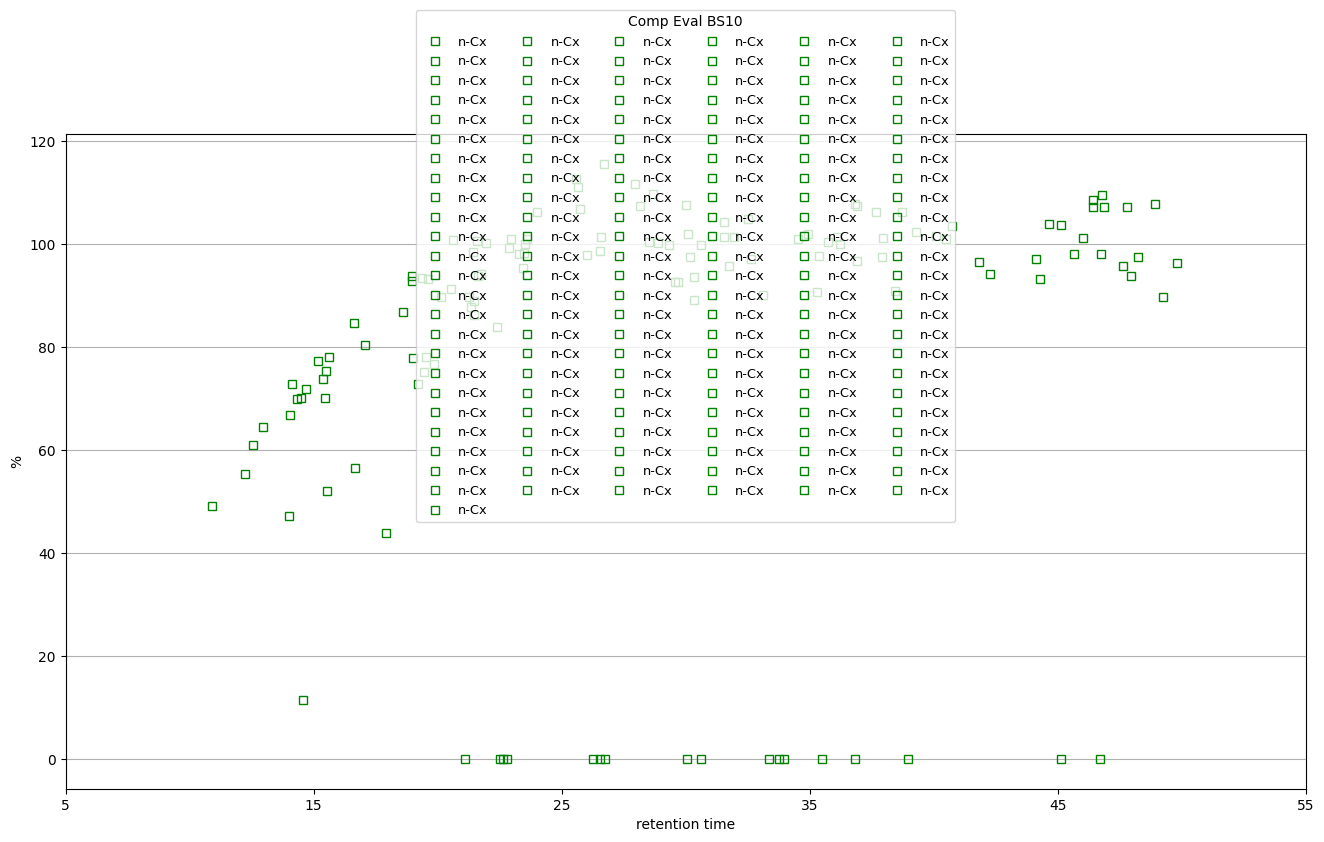

In [26]:
import ValueStorage
import matplotlib.pyplot as plt
import numpy as np
countPerElement = [4,7,6,2,4,11,9,2,4,14,8,6,11,4,6,26,6,6,9]
fig, ax = plt.subplots(figsize=(16,10))
                                                                                          

for i in ValueStorage.PW_PlotValues:
    datax, datay = find_value(i)
    ax.plot(datax,datay , marker='s',markerfacecolor='none', ls='none',color = "green",label = "n-Cx")

plt.xticks(np.arange(5,65, step=10)) 
plt.yticks(np.arange(0,140,step=20))
ax.set_xlabel("retention time", loc='center')
ax.set_ylabel('%')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5,1.2),
    ncol = 6,
    title = "Comp Eval BS10",
    fontsize = 9.4,
    )
plt.grid(axis = "y")